# 豬的分類

## 目標
給予一隻豬的特徵，判定他是屬於粉紅豬、鬃毛豬或黑毛豬。


### 特徵
* 體重
    * 資料為常態分佈，平均值為$210$，標準差為$75$。
    * 規則：
        * $20$kg ~ $150$kg 之間：粉紅豬（pink）
        * $150$kg ~ $250$kg 之間：鬃毛豬（brown）
        * $250$kg ~ $400$kg 之間：黑毛豬（black）
* 美味程度
    * 資料為平均分佈。
    * 規則：
        * 一般（normal）：粉紅豬（pink）
        * 好吃（good）：鬃毛豬（brown）
        * 美味（delicious）：黑毛豬（black）

### 種類
* 粉紅豬（pink）
* 鬃毛豬（brown）
* 黑毛豬（black）

### 已知規則
優先透過體重判斷屬於哪種豬。

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

## 資料前處理
讀取使用 `data_gen.py` 所產生的資料 `data/pig.csv`。
使用 `sklearn.preprocessing.LabelEncoder` 將特徵美味程度 `taste` 以及答案種族 `race` 進行 encoding。

In [2]:
df = pd.read_csv('data/pig.csv')

le_taste = LabelEncoder()
le_race = LabelEncoder()
le_taste.fit(df['taste'])
le_race.fit(df['race'])
df['taste'] = le_taste.transform(df['taste'])
df['race'] = le_race.transform(df['race'])
print(df)

        weight  taste  race
0   425.024343      2     0
1   227.674095      0     1
2   265.257149      0     0
3   160.608049      0     1
4   155.976522      1     1
5   250.508593      1     0
6   202.728322      0     1
7   294.630511      0     0
8   295.319873      1     0
9   161.722632      2     1
10   91.259955      1     2
11  212.107269      1     1
12  267.930961      1     0
13  183.762118      2     1
14  254.143730      2     0
15  157.099094      2     1
16  150.796903      0     1
17  126.256667      2     2
18  287.888072      2     0
19  250.266691      0     0


## 訓練
使用決策術進行訓練，全部資料共20筆，將資料分成訓練用特徵 `train_x` 及答案 `train_y` 共$15$筆，測試用特徵 `test_x` 及答案 `test_y` 共$5$筆。

In [3]:
train = df.loc[:14]
test = df.loc[15:]

train_x = train.loc[:, ['weight', 'taste']]
train_y = train.loc[:, ['race']]

test_x = test.loc[:, ['weight', 'taste']]
test_y = test.loc[:, ['race']]

In [4]:
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 預測結果
精確度（accuracy）只有$0.8$。透過下面視覺化的範例進行分析可以知道：
1. 最初的分類是將體重使用$239.091$為分界點，大於$239.091$的是黑毛豬，小於的需要進一步細分。這與產生資料所使用的規則是相同的，只是實際上是使用$250$這個數字而非$239.091$，可以推論造成差距的原因是**資料量太少**，或者是**標準差過大**的影響。
2. 小於$239.091$群組中，進一步使用了$123.618$作為分類，大於$123.618$的為鬃毛豬，小於的是粉紅豬，與產生資料所使用的規則是相同的，只是實際上是使用$150$這個數字而非$123.618$，同樣可以推論造成差距的原因是**資料量太少**，或者是**標準差過大**的影響。

In [5]:
accuracy_score(clf.predict(test_x), test_y)

0.8

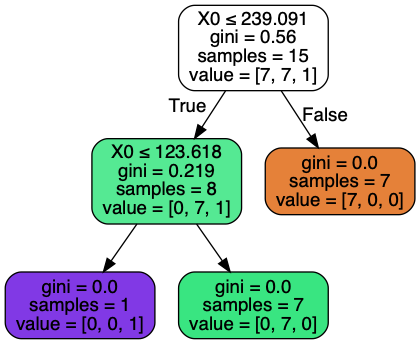

In [6]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())